# Supersonic Flow over a Flat Plate

This notebook examines a two-dimensional, laminar, viscous, supersonic flow past a flat plate with zero angle of attack. The main source of this notebook is:

$\textit{Computational Fluid Dynamics, The Basics With Applications}$ by John D. Anderson.

## Problem Statement

As incoming supersonic flow meets the leading edge of a thin flat plate with no angle of attack, a viscous and laminar boundary layer develops. The boundary layer remains laminar as long as the Reynolds number remains below the turbulent regime.

This physical phenomenon causes the development of a shock wave, which is curved due to the presence of the boundary layer, as seen in Figure 1.  Anderson (1995) states that depending on the incoming Mach number, Reynolds number, and plate temperature, the shock layer can contain regions of both viscous and inviscid flows, or it can also be characterized as fully viscous.

Additionally, viscous dissipation of kinetic energy in the shock layer can cause high temperature areas and high heat transfer rates (Anderson, 1995).

<img src="./figures/flow_diagram.png">


#### Figure 1. Supersonic flow over a flat plate

## The Governing Equations

The problem can be studied using the time-dependent, two-dimensional Navier-Stokes equations with negligent body forces and volumetric heating (Anderson, 1995). The equations for continuity, and x and y momentum are:

\begin{align}
0=& \frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u ) + \frac{\partial}{\partial y} ( \rho v )   \\
0 =& \frac{\partial}{\partial t}( \rho u ) + \frac{\partial}{\partial x}( \rho u^2 + P - \tau_{xx}) + \frac{\partial}{\partial y} ( \rho uv -\tau_{yx}) \\
0=& \frac{\partial}{\partial t}( \rho v ) + \frac{\partial}{\partial x} ( \rho uv - \tau_{xy} ) + \frac{\partial}{\partial y}  ( \rho v^2 + P -\tau_{yy} ) \\
0=& \frac{\partial}{\partial t}E_{t} + \frac{\partial}{\partial x} \big( (E_{t}+P)u - u \tau_{xx} - v \tau_{xy} + q_{x} \big) + \frac{\partial}{\partial x} \big( (E_{t}+P)v - u \tau_{yx} - v \tau_{yy} + q_{y} \big) \\
\end{align}

In these equations, $E_{t}$ is the sum of kinetic and internal energy per unit volume, and is defined as:

\begin{equation}
E_{t} = \rho \big( e + \frac{V^2}{2} \big) \\
\end{equation}

Additionally, the shear and normal stresses can be expressed in terms of velocity gradients as:

\begin{align}
\tau_{xy} &= \tau_{yx} = \mu \big( \frac{\partial u }{\partial y} + \frac{\partial v}{\partial x} \big) \\
\tau_{xx} &= \lambda \big( \nabla  \textbf{V} \big) + 2 \mu \frac{\partial u }{\partial x} \\
\tau_{yy} &= \lambda \big( \nabla  \textbf{V} \big) + 2 \mu \frac{\partial v }{\partial y} \\
\end{align}

From Fourier's heat conduction law, the heat flux components are:

\begin{align}
q_{x} &= -k \frac{\partial T }{\partial x} \\
q_{y} &= -k \frac{\partial T }{\partial y}
\end{align}

So far, the system consists of four equations (1 through 4 above). The system also contains nine unknowns, which are:

* density, $\rho$ 
* x-velocity, u 
* y-velocity, v 
* velocity magnitude, $|\textbf{V}| $
* pressure, P 
* temperature, T 
* internal energy, e 
* viscosity, $\mu$, and 
* thermal conductivity, k

Since there are more unknowns than equations, we need to close the system by adding more equations. Assuming that the air is calorically perfect, we can write an additional five equations for pressure, internal energy, velocity magnitude, viscosity, and thermal conductivity.

1. P = $\rho$RT
2. e = $c_{v}$T
3. $|\textbf{V}| $ = $\sqrt{u^{2}+v^{2}}$
4. $\mu  = \mu_{o} \big(\frac{T}{T_{o}} \big)^{\frac{3}{2}} \bigg( \frac{T_{o} +110}{T + 110} \bigg) \hspace{1em} \text{(Sutherland's law)}$ 
5. Pr = 0.71 = $\frac{\mu c_{p}}{k} \hspace{1em} \text{(Prandtl number)}$

Now that the system of equations is closed, we can proceed to the discretization scheme.

## Discretization 

In this notebook, the governing equations are discretized using the MacCormack finite difference scheme. As we have learned from previous notebooks, the MacCormack scheme is second order accurate in space and time. 

To begin the discretization process, we can express the system of governing equations in vector form:

\begin{equation}
\frac{\partial \textbf{U}}{\partial t} + \frac{\partial \textbf{E}}{\partial x} + \frac{\partial \textbf{F}}{\partial y} = 0,
\end{equation}

where the vectors $\textbf{U}, \textbf{E}$, and $\textbf{F}$ are:

$$\textbf{U} = 
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho v \\
E_{t}
\end{array} \right]$$

$$\textbf{E} = 
\left[ \begin{array}{c}
\rho u\\
\rho u^2 + P - \tau_{xx}\\
\rho uv - \tau_{xy} \\
(E_{t}+P)u - u\tau_{xx} - v\tau_{xy} + q_{x} 
\end{array} \right] $$ 

$$\textbf{F} = 
\left[ \begin{array}{c}
\rho v \\
\rho uv - \tau_{xy}  \\
\rho v^2 + P - \tau_{xy} \\ 
(E_{t}+P)v - u\tau_{xy} - v\tau_{yy} + q_{y}
\end{array} \right] $$ 

Now that we have arranged the properties of mass momentum, energy, and fluxes, we can apply the MacCormack two-step method. It is as follows:

predictor step:

\begin{equation*}
U^*_{i,j} = U^n_{i,j} - \frac{\Delta t}{\Delta x} (E^n_{i+1,j}-E^n_{i,j}) - \frac{\Delta t}{\Delta y} (F^n_{i,j+1}-F^n_{i,j})\
\end{equation*}

corrector step:

\begin{equation*}
U^{n+1}_{i,j} = \frac{1}{2} \big( U^n_{i,j} + U^*_{i,j} - \frac{\Delta t}{\Delta x} (E^*_{i,j} - E^{*}_{i-1,j}) - \frac{\Delta t}{\Delta y}(F^*_{i,j} - F^{*}_{i,j-1}) \big) \ 
\end{equation*}



### The issue of maintaining second order accuracy

Anderson (1995) specifies that in order to maintain second order accuracy, the x derivatives appearing in the E flux vector (e.g. in the shear and normal stresses) are differenced in the opposite direction of discretization of $\frac{\partial E}{\partial x}$, while the y derivatives are discretized centrally. Similarly, the y derivatives appearing in F flux are differenced in the opposite direction of discretization of $\frac{\partial F}{\partial y}$, while the x derivatives are discretized centrally.

As an example, consider the predictor step. The E flux vector is differenced forward in space, which means that the x derivatives that appear in E will be discretized in a backward direction and the y derivatives will be differenced centrally. Additionally, the F flux vector is differenced in a y-forward direction, which means that the y derivatives that appear in F will be discretized in a backward direction and the x derivatives will be differenced centrally. Then, for the predictor step, we have discretizations as such:

$\begin{align}
\frac{\partial E}{\partial x} \approx \frac{1}{\Delta x} (E_{i+1,j}-E_{i,j}) 
\end{align}$

and the derivatives appearing in E are discretized like this:

$
\hspace{2.5em} E_{0} = \rho u, \text{(no derivatives)} 
$

$\begin{align*}
\hspace{2.5em}E_{1} = \rho u^{2} + &P - \\
& \lambda \big( \frac{\textbf{V}_{i,j}-\textbf{V}_{i-1,j} }{\Delta x} + \frac{\textbf{V}_{i,j+1}-\textbf{V}_{i,j-1} }{2 \Delta y} \big) + 2\mu \big( \frac{u_{i,j}-u_{i-1,j}}{\Delta x}  \big)
\end{align*}$

$\begin{align*}
\hspace{2.5em}E_{2} = \rho uv - \mu \big( \frac{u_{i,j+1}-u_{i,j-1}}{2 \Delta y} + \frac{v_{i,j}-v_{i-1,j}}{\Delta x} \big) 
\end{align*}$

$\begin{align*}
\hspace{2.5em}E_{3} = \hspace{0.3em}  &(E_{t}+P)u - \\ & u \bigg( \lambda \big(\frac{ \textbf{V}_{i,j} - \textbf{V}_{i-1,j}  } {\Delta x} + \frac{ \textbf{V}_{i,j+1} - \textbf{V}_{i,j-1}  } {2 \Delta y} \big) + 2\mu \big( \frac{u_{i,j}-u_{i-1,j}}{\Delta x}  \big) \bigg) - \\ & v \bigg(  \mu \big( \frac{u_{i,j+1}-u_{i,j-1}}{2 \Delta y} + \frac{v_{i,j}-v_{i-1,j}}{\Delta x} \big) \big) + \\
&\frac{T_{i,j}-T_{i-1,j}}{\Delta x}
\end{align*}$

For the F flux vector, we would have:

$\begin{align}
\frac{\partial F}{\partial y} \approx \frac{1}{\Delta y} (F_{i,j+1}-F_{i,j}) 
\end{align}$,

and the derivatives appearing in F are discretized like this:

$
\hspace{2.5em} F_{0} = \rho v, \text{(no derivatives)}
$

$\begin{align*}
\hspace{2.5em} F_{1} = \rho uv - \mu \big( \frac{u_{i,j}-u_{i,j-1}}{\Delta y} + \frac{v_{i+1,j}-v_{i-1,j}}{2 \Delta x} \big) 
\end{align*}$

$\begin{align*}
\hspace{2.5em} F_{2} = \rho v^{2} + P - \mu \big( \frac{u_{i,j}-u_{i,j-1}}{ \Delta y} + \frac{v_{i+1,j}-v_{i-1,j}}{2 \Delta x} \big) 
\end{align*}$

$\begin{align*}
\hspace{2.5em} F_{3} = \hspace{0.3em} &(E_{t}+P)v - \\ & u \mu \big( \frac{u_{i,j}-u_{i,j-1}}{ \Delta y} + \frac{v_{i+1,j}-v_{i-1,j}}{2 \Delta x} \big) - \\ & v \bigg( \lambda \big( \frac{ \textbf{V}_{i+1,j} - \textbf{V}_{i-1,j}  } {2 \Delta x} + \frac{ \textbf{V}_{i,j} - \textbf{V}_{i,j-1}  } {\Delta y}  \big) + 2\mu \big( \frac{u_{i,j}-u_{i,j-1}}{\Delta y}  \big) \bigg) + \\
&\frac{T_{i,j}-T_{i,j-1}}{\Delta y}
\end{align*}$

This discretization process is also done for the corrector step, which means that we end up with many functions for calculating the shear and normal stress components. In fact, using this process, we end up with eight different functions for normal and shear stresses, and four different functions for heat fluxes.

For further reading on the MacCormack technique, consult the numerical-mooc notebook
["Convection Schemes"](https://github.com/numerical-mooc/numerical-mooc/blob/master/lessons/03_wave/03_02_convectionSchemes.ipynb), and Anderson (1995), Chapter 6.3.

## Computational Domain

Obviously, we want a computational domain that accurately captures the shock wave. The dimensions of the the computational domain will depend on the specific problem parameters. Anderson (1995) recommends a Reynolds number of about 1000 to relate the incoming freestream velocity and the plate length. A reasonable choice is to make the plate length the length of the computational x-length:

$x_l = L_{plate}$

Using the definition of Reynolds number, and assuming we know the freestream values for density, velocity, and viscosity, we can find the computational x-length:

$Re = \frac{\rho u L_{plate}}{\mu} \approx 1000$

Having established the length of the plate as the computational x-length, the computational y-length is established according to the assumption that a length five times the height of the boundary layer at the trailing edge will be sufficient to capture the shock (Anderson, 1995). The height of the boundary layer at the trailing edge, by Blasius calculation, is the following:

$\delta = \frac{5 L_{plate}}{\sqrt {Re_L}} $, and

$y_l = 5\delta  $

<img src="./figures/computational_domain.png">


#### Figure 2. Computational Domain

Using this information, we can calculate the x and y spacing between grid points:

$\Delta x = \frac {x_l}{n_{x}-1}$, and
$\Delta y = \frac {y_l}{n_{y}-1}$,

where $n_x$ and $n_y$ are the number of grid points in the x and y direction, respectively. For this problem, we can follow the general requirements for choosing the number of grid points (Anderson, 1995):

$Re_{\Delta x} = \frac{\rho_{i,j} u_{i,j} \Delta x}{\mu_{i,j}}, \hspace{0.5em} Re_{\Delta x} \leq 30-40$, and

$Re_{\Delta y} = \frac{\rho_{i,j} v_{i,j} \Delta x}{\mu_{i,j}}, \hspace{0.5em} Re_{\Delta y} \leq 3-4$.

## Time Stepping Requirements

Because the MacCormack scheme is explicit, we need to employ a stability criterion for the scheme. Using the CFL criterion in Anderson (1995), we can obtain an adaptive time step function:

$\begin{align*}
(\Delta tcfl)_{i,j} = \big( \frac{|u_{i,j}|}{\Delta x} + \frac{|v_{i,j}|}{\Delta y} + a_{i,j} \sqrt{\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}} + 2v^{'}_{i,j} (\frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}) \big)^{-1}
\end{align*}$

where

$
\hspace{3em} v^{'}_{i,j} = max \big( \frac{ \frac{4}{3} \mu_{i,j} (\gamma \mu_{i,j} / Pr) }{\rho_{i,j}} \big)
$, 

and the time step is

$\hspace{4em} \Delta t = min \big( K(\Delta tcfl)_{i,j} \big)$

K is a fudge factor chosen between 0.5 and 0.8 to ensure stability (Anderson, 1995).

## Problem Setup

Now that we have discussed the governing equations, discretization method, and computational requirements in time and space, we are ready to look at a specific problem.

We choose the freestream conditions:

* Initial values of air at sea level
* Incoming speed of Mach 4

At an incoming velocity of Mach 4, using sea level values for density, viscosity, and speed of sound, we can obtain the computational x and y dimensions:

$x_{l} = \frac{1000 \mu}{\rho u} \approx 1.07x10^{-5} meters$

$y_{l} = 5\delta \approx 8.48x10^{-6} meters$

Although the computational domain is small, it is sufficiently large compared to the mean free path of air molecules (Anderson, 1995). Similarly, satisfying the spacing requirements, we choose the number of grid points:

$n_x$ = $n_y$ = 70

## Initial and  Boundary Conditions

Initially, the values of $\textbf{U}$ are given based on the following initial conditions:

* u = 340.28 $\frac{m}{s}$ x 4 = 1361.12 $\frac{m}{s}$
* v = 0
* T = 288.16 K
* P = 101325 Pa
* $\rho$ $\approx$ 1.225 $\frac{kg}{m^{3}}$

These conditions are initialized everywhere except at the the leading edge and plate surface, where

* u = v = 0, and
* $T_{plate}$ = $T_{wall}$,

where $T_{wall}$ is constant and is set equal to initial freestream temperature. Figure 3 below shows the application of boundary conditions. Note that in zone 4 the values for the x and y components of velocity, pressure, and temperature are extrapolated from interior points. Generally this is is accomplished as illustrated by the pseudocode:

$u_{-1,1:-1} = 2u_{-2,1:-1} - u_{-3,1:-1}$.

<img src="./figures/bc.png">


#### Figure 3. Boundary Conditions

## Run Time!

First, we'll import the necessary libraries:

In [1]:
import numpy
from matplotlib import pyplot    
%matplotlib notebook

We proceed to run the program by calling all of the parameters and functions saved in separate $\textbf{.py}$ scripts. Let's look at these scripts.

Firstly, the $\textbf{parameters.py}$ script contains all of the freestream values necessary to initialize the problem, as well as grid dimensions and nodes. We can see what "parameters.py" contains by loading the script in a cell after we run the script. Use $\textbf{%load parameters.py}$, and check it out!

In [2]:
%run parameters.py

Now that we have loaded the initial conditions and grid information, we call another script that contains a function to initialize the flow field. The script $\textbf{initial_conditions.py}$ contains this function. Generally, if you wish to see a description of each function within a script, use the general command  $\textbf{?function_name}$  after the scripts are run. 

The following lists contain the scripts and functions used to calculate the solution:

* initial_conditons.py
    - get_Uinitial

* functions.py
    - get_Temperature
    - get_visc
    - get_BC
    - get_tau_xy_predict
    - get_tau_xy_Fpredict
    - get_tau_xx_predict
    - get_tau_yy_predict
    - get_E_flux_predictor
    - get_F_flux_predictor
    - get_dt
    - get_tau_xy_correct
    - get_tau_xy_Fcorrect
    - get_tau_xx_correct
    - get_tau_yy_correct
    - get_E_flux_correct
    - get_F_flux_correct
    - maccormack
    
    
Remember, if you want to know more details about each function, go ahead and run $\textbf{?function_name}$ to get docstring information.


In [3]:
%run initial_conditions.py

In [4]:
UU = get_Uinitial(nx, ny, rho_inf, u_inf, v_inf,\
                  V_inf, T_inf, e_inf, T_wall, cv, R)

In [5]:
%run functions.py

In [6]:
US = maccormack(UU,nt,nx,ny,dx,dy,T_wall,\
                T_inf,rho_inf,u_inf,cv,cp,dyn_visc,Pr,lmbda,R,gamma)

Mass is conserved by 99.36 percent


In [7]:
numpy.shape(US)

(2413, 4, 70, 70)

## Post-Processing - Converged Solution

Once we have a solution we can do some post-processing analysis to make sense of our results. First, let's discuss the time-dependent convergence of the solution. Anderson [1995] suggests that the solution is converged once the density at each grid point changes no less than $1x10^{-8}$ between time steps. We can do a quick check, just to convince ourselves that the solution has converged:


In [8]:
numpy.where((US[-1,0,:,:] - US[-2,0,:,:]) > 1e-8)

(array([], dtype=int64), array([], dtype=int64))

It looks like our solution has converged (yes!). Additionally, we can see that conservation of mass is satisfied to within 0.6 % percent (see printed statement right below the code cell for maccormack function). Conservation of mass was calculated observing mass flow rates across inflow and outflow boundaries. A trapezoidal function (numpy.trapz) was used to integrate the mass flow accross these boundaries.

Now, let's call our post-processing script, $\textbf{pp_functions.py}$, to plot some graphs. This script has the following functions:

    - get_grid
    - get_Pressure
    - get_Pressure_plot
    - get_Temperature_plot
    - get_Velocity_plot
    - get_cplots
    

In [9]:
%run pp_functions.py

Let's create a mesh:

In [10]:
x,y,mx, my = get_grid(L,Y, nx, ny)

Next order of business is to plot some results!

### Pressure 

The first figure immediately below shows the plate surface pressure, which is non-dimensionalized by the atmospheric pressure. This result is $\textit{qualitatively}$ in good agreement with Anderson (1995). Anderson (1995) shows a maximum non-dimensionalized pressure of around 3 units, whereas this solution shows a maximum non-dimensionalized pressure of 4 units. The discrepancy may be in the initialization of the flow field. The initialized field in Anderson (1995) is not specified. The methodology of this current solution initializes the flow field with inflow freestream conditions as specified in the $\textit{parameters.py}$ script.

Another interesting result seen in figure 1 are the oscilations that occur in the leading edge region. Anderson (1995) concludes that it is unclear whether these results are due to the numerical scheme itself or whether this is part of the physics of the problem.


Additionally, it is consistent with the pressure contour plot below. Look closely at the surface pressure contour and you'll see that the pressure is highest right after the leading edge. This makes sense!

In [11]:
Uf = US[-1,:,:,:].copy() #last time step values
Tf = get_Temperature(Uf, nx, ny, T_wall, T_inf, cv) #at converged solution
Pf = get_Pressure(Uf, Tf,nx,ny,R) #pressure at converged solution

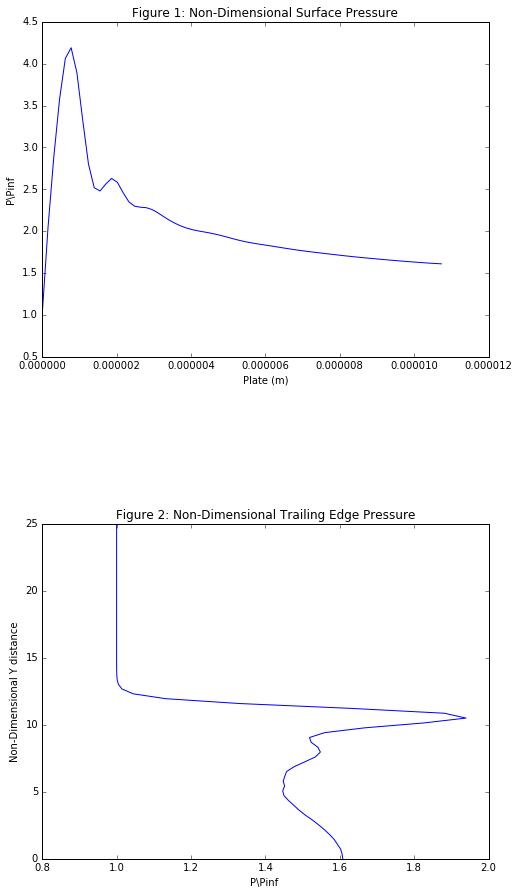

In [12]:
%matplotlib inline
Pressure_plot = get_Pressure_plot(x,y,Re, Pf, P_inf)

### Temperature

Figure 3 below shows good $\textit{qualitative}$ agreement with the result presented in Anderson (1995). The profile shows varying temperatures due to the capture of the shock wave, and we also notice that the temperature gradient becomes zero as we move out of the shock region and closer to the outer, freestream region.

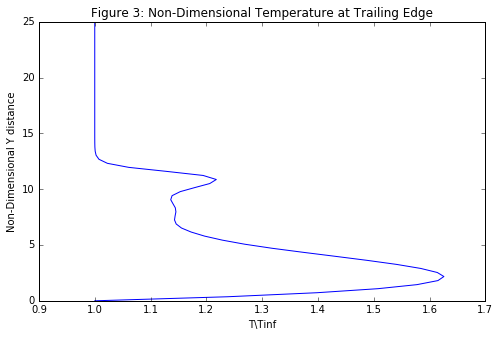

In [13]:
%matplotlib inline
temperature_plot = get_Temperature_plot(x,y,Re,Tf,T_inf)

### Velocity 

Figure 4 below shows the x component of velocity at the trailing edge. We can see that the velocity values approach the freestream velocity as we move towards the outer free stream conditions. Notice the zero velocity gradient as well.

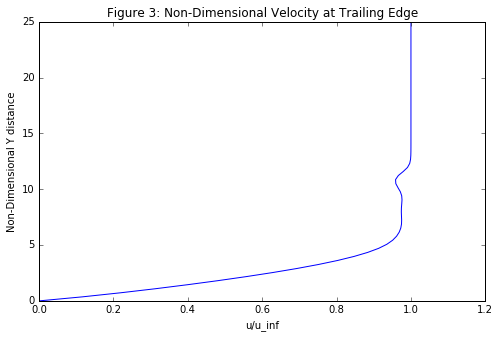

In [14]:
velocity_plot = get_Velocity_plot(x,y,Re, Uf, u_inf)

### Contour Plots

The contour plots below show the values of momentum, energy, and pressure at the last time step. We can see that the highest concentrations of energy, for example, occur at the shock wave due to high heat transfer rates (Anderson, 1995).

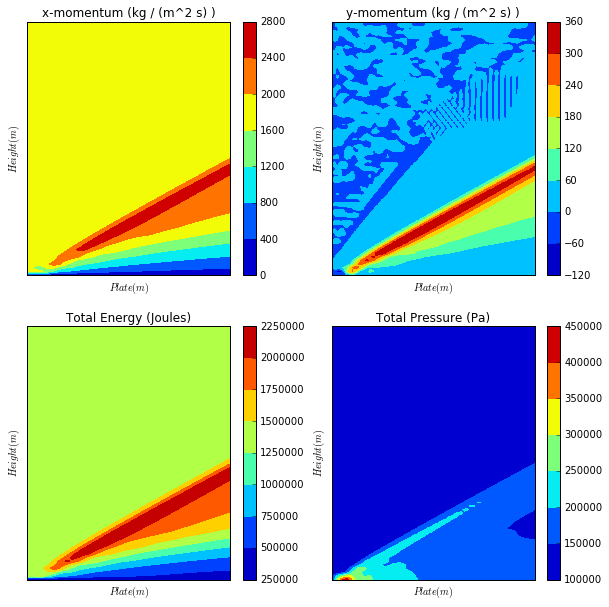

In [15]:
%matplotlib inline
contour_plots = get_cplots(mx,my,Uf, Tf, R)

## Animate!

Lastly, here's an animation of the y-momentum profile as the shock forms over time. The red area represents the areas of highest momentum. Pretty cool!

P.S. If you want to see the code that was used for this animation, run $\textbf{%load animation_script.py}$ !

<img src="ymom.gif">

## Dig Deeper

We have just solved a problem in which the plate temperature is kept constant. Here's an interesting question: 

$\textit{what would happen if the plate temperature was adiabatic instead?}$

It turns out that solving this problem with an adiabatic surface leads to some interesting results. In an adiabatic wall, there is no heat transfer to the surface from the flow field. Then, by Fourier's law of heat conduction, we can say that the temperature gradient at the wall is zero. We can express this as:

$
\begin{equation}
\big( \frac{\partial T}{\partial y} \big)_{wall} = 0
\end{equation}$

To satisfy this condition, we can develop a discretization scheme that satisfies this zero flux condition while maintaining second order accuracy. 


Try modifing the code to solve the problem of $\textit{supersonice flow past a plate with an adiabatic surface}$. Have fun!

In [16]:
from IPython.core.display import HTML
#css_file = '/Users/Luis/numerical-mooc/styles/numericalmoocstyle.css'
css_file = './numericalmoocstyle.css'
HTML(open(css_file, "r").read())